## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Checking the DataFiles

In [2]:
df_links = pd.read_csv('Data/links.csv')
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [86]:
df_movies = pd.read_csv('Data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings = pd.read_csv('Data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags = pd.read_csv('Data/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Explatory Data Analysis

In [6]:
# view dimensions of dataset

df_links.shape

(9742, 3)

In [7]:
# view dimensions of dataset

df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [8]:
df_links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [9]:
df_movies.shape

(9742, 3)

In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [12]:
df_ratings.shape

(100836, 4)

In [13]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
df_tags.shape

(3683, 4)

In [16]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [17]:
df_tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### Data Cleaning

    We'll focus on handling missing values, converting timestamps, and preparing the text fields (genres and tag).

**1. Handling missing values**

    Lets check missing values and decide on how to handle them.

In [18]:
# Checking for missing values in each dataset
print("Missing values in df_links:")
print(df_links.isnull().sum())

print("\nMissing values in df_movies:")
print(df_movies.isnull().sum())

print("\nMissing values in df_ratings:")
print(df_ratings.isnull().sum())

print("\nMissing values in df_tags:")
print(df_tags.isnull().sum())


Missing values in df_links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing values in df_movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in df_ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in df_tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


    Since tmdbId has some missing values, we can either remove those rows or fill them in if we have extra data. For now, let's drop rows with missing tmdbId.

In [19]:
# Drop rows with missing tmdbId
df_links_cleaned = df_links.dropna(subset=['tmdbId'])


**1.2 Convert Timestamps**   

    Convert the timestamp columns in df_ratings and df_tags to a more readable date format.

In [20]:
# Convert timestamps in df_ratings and df_tags to datetime
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s')


**1.3 Text Preprocessing: Splitting Genres and Tags**  

    We'll split the genres column in df_movies into separate genres for analysis.

In [87]:
# Splitting genres into separate columns
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split('|'))


In [64]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


    For tags, we don't need splitting but may tokenize or vectorize them later for building content-based filtering.

**1.4 Verifying the Data After Cleaning**  

    Let's check the structure of the cleaned data and make sure the missing values and conversions are handled correctly.

In [22]:
# Check the info of cleaned data
df_links_cleaned.info()
df_ratings.info()
df_tags.info()
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----

In [23]:
# Checking for duplicates
print("Duplicates in links:\n", df_links_cleaned.duplicated().sum())
print("Duplicates in ratings:\n", df_ratings.duplicated().sum())
print("Duplicates in tags:\n", df_tags.duplicated().sum())

Duplicates in links:
 0
Duplicates in ratings:
 0
Duplicates in tags:
 0


## **2. EDA**

**2.1 Distribution of Ratings**  

    We'll begin by visualizing the distribution of movie ratings to see how users have rated the movies.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


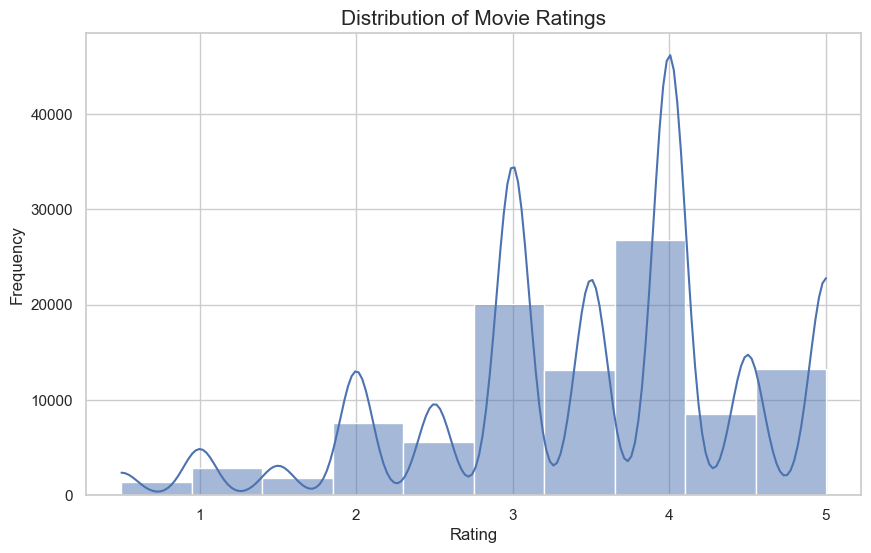

In [24]:

# Setting a style for the plots
sns.set(style="whitegrid")

# Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


    Most common rating: The ratings are highly concentrated around 4, with a peak between 3.5 and 4. This suggests that users generally tend to rate movies favorably, with 4 being the most frequent rating.   

    Rating preference: There is a clear tendency for users to give high ratings (between 3 and 5). Low ratings (below 2) are much less frequent, indicating that most movies are either liked or considered average by the users.   

    Less negative feedback: The small number of very low ratings suggests users either watch movies they are likely to enjoy or may avoid giving extremely low ratings.   

**2. Popular Genres**   

    To analyze the popular genres, we'll extract individual genres from the df_movies dataset and count the occurrences.

In [25]:
# Check the first few rows of the genres column
print(df_movies['genres'].head(10))


0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: genres, dtype: object


In [26]:
# Check for null or empty values in genres
print(df_movies['genres'].isnull().sum())  # Count of NaN values
print(df_movies[df_movies['genres'] == ''])  # Empty string check


0
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


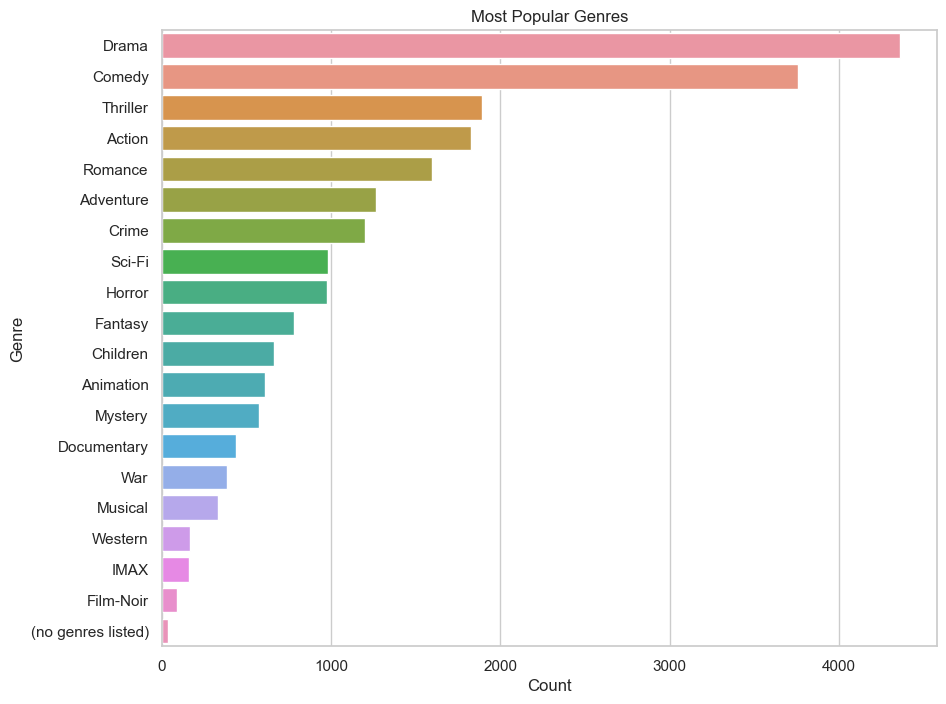

In [27]:
# Explode the list of genres into individual rows
genres = df_movies['genres'].explode()

# Plot the most popular genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


`Drama` and `Comedy` are by far the most popular genres, with both appearing in over 4000 movies.     
`Thriller`, `Action`, and `Romance` are also popular, though with slightly fewer appearances.   
Genres like `War`, `Musical`, `Western`, and `IMAX` are much less frequent.  
There's a small portion of movies where no genres are listed, which might be worth investigating.   

**3. Movie Popularity (Most Rated Movies)**  

We'll find the most rated movies by grouping the ratings and counting how many ratings each movie received.

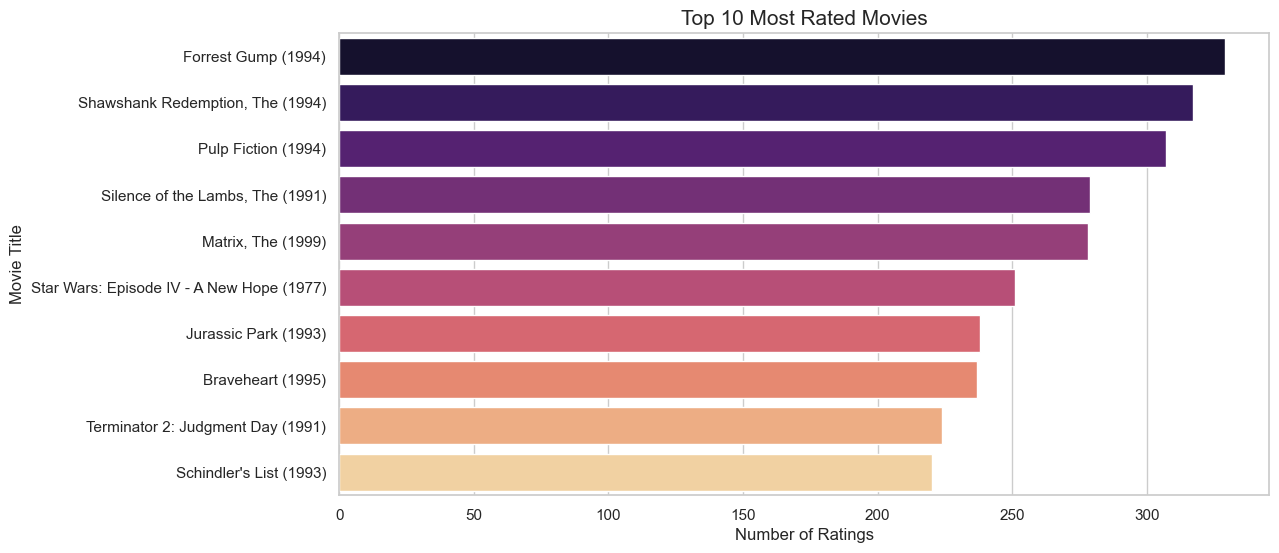

In [28]:
# Counting the number of ratings per movie
movie_ratings_count = df_ratings.groupby('movieId')['rating'].count().reset_index()
movie_ratings_count.columns = ['movieId', 'num_ratings']

# Merging with the movies dataset to get movie titles
popular_movies = pd.merge(movie_ratings_count, df_movies[['movieId', 'title']], on='movieId')

# Sorting by the number of ratings
popular_movies = popular_movies.sort_values(by='num_ratings', ascending=False).head(10)

# Plotting the top 10 most rated movies
plt.figure(figsize=(12,6))
sns.barplot(x='num_ratings', y='title', data=popular_movies, palette='magma')
plt.title('Top 10 Most Rated Movies', fontsize=15)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()


This plot showcases the Top 10 Most Rated Movies in the dataset:  

`Forrest Gump (1994)` is the most rated movie, with over 300 ratings, indicating its high popularity and significance among users.  
Other iconic movies like `Shawshank Redemption (1994)`, `Pulp Fiction (1994)`, and `Silence of the Lambs (1991)` also have a large number of ratings, reflecting their cultural impact and lasting relevance.  
`Movies like Matrix (1999)` and `Star Wars: Episode IV - A New Hope (1977)`, which belong to the sci-fi and adventure genres, show up as highly rated, underlining the strong fanbase for these genres.  

The range of movies spans from drama to action to historical epics, suggesting a diversity of preferences among users. Movies from different decades are represented as well, showing that both older and newer films maintain strong relevance. 

The presence of classics like `Schindler's List (1993)` and `Terminator 2: Judgment Day (1991)` points to the enduring appeal of certain genres like drama and action, with viewers continually revisiting these films.

**Calculate Average Ratings per Movie**   

    We already have the number of ratings per movie. Now, let's calculate the average rating for each movie. This will give us insights into the quality perception of movies.

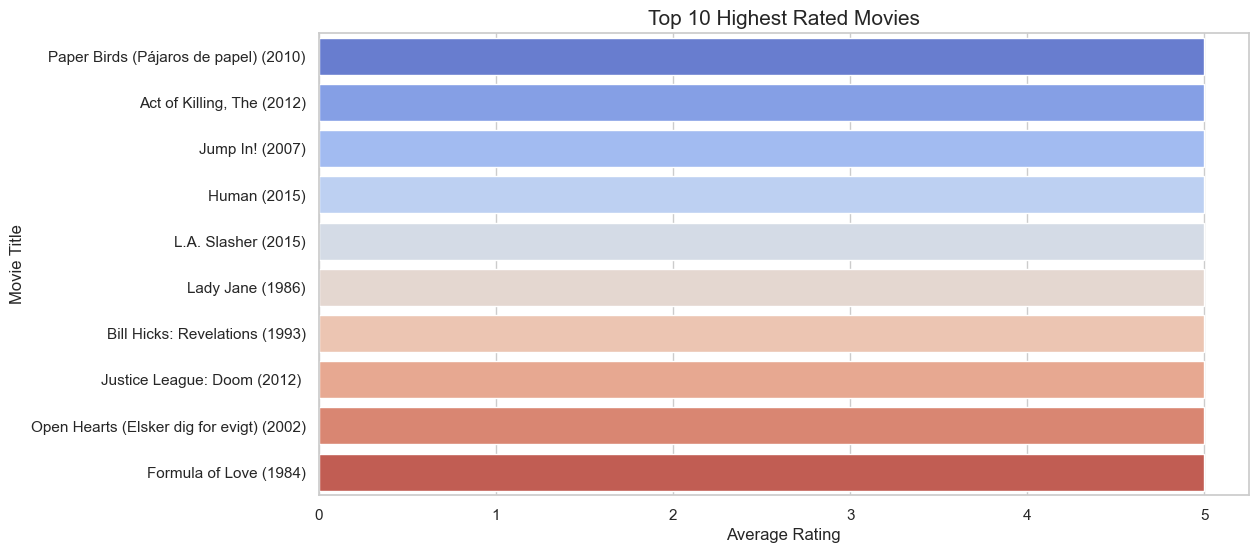

In [29]:
movie_avg_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index()
movie_avg_ratings.columns = ['movieId', 'avg_rating']

# Merge the average rating with movie titles
movie_avg_ratings = pd.merge(movie_avg_ratings, df_movies[['movieId', 'title']], on='movieId')

# Sort by average rating
highest_rated_movies = movie_avg_ratings.sort_values(by='avg_rating', ascending=False).head(10)

# Plotting the top 10 highest rated movies
plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y='title', data=highest_rated_movies, palette='coolwarm')
plt.title('Top 10 Highest Rated Movies', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()


**Create a User-Movie Interaction Matrix**   

    For collaborative filtering, we'll need to create a user-movie matrix where rows represent users, and columns represent movies. The values in the matrix will be the movie ratings by users.

In [30]:
user_movie_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating')


### **Preprocessing Steps**

**Data Transformation**  

**Encoding the Genres (for content-based models):**    

    We may want to use one-hot encoding or multi-label binarization on genres if we plan to build content-based filtering models later on.

In [31]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_movies_clean = df_movies.join(pd.DataFrame(mlb.fit_transform(df_movies.pop('genres')), 
                                  columns=mlb.classes_, 
                                  index=df_movies.index))


**Normalization or Standardization (for collaborative filtering)**   

    We may want to normalize or standardize the ratings to make them more comparable. We can use MinMaxScaler or StandardScaler from sklearn.preprocessing.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix.fillna(0))  # Normalize the matrix


**Build a Collaborative Filtering Model**   

We can use collaborative filtering techniques to recommend movies to users based on what similar users have rated. will start with K-Nearest Neighbors (KNN) to find similar users:

In [33]:
from sklearn.neighbors import NearestNeighbors

# Fill NaN values with 0 for the model
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Fit a KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_movie_matrix_filled)


NearestNeighbors(algorithm='brute', metric='cosine')

    Since we've already fitted the KNN model, the next step is to make predictions and generate recommendations based on the model.

**Choose a User to Make Recommendations for:**  

In [34]:
# Choose a user ID to recommend movies for (e.g., userId = 1)
user_id = 1

# Get the index of the user in the user-movie matrix
user_index = user_movie_matrix.index.get_loc(user_id)


**Find the Nearest Neighbors for the Selected User:**

    We'll now use the KNN model to find the nearest neighbors (i.e., users with similar movie preferences) for the chosen user.

In [35]:
# Find the nearest neighbors
distances, indices = model_knn.kneighbors(user_movie_matrix_filled.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)


**Generate Recommendations Based on Neighbors:**  

    Now, based on the nearest neighbors' preferences, we can recommend movies to the user. We'll want to look at movies that the user hasn't rated but their neighbors have rated highly.

In [36]:
# Get the movie indices rated by the neighbors
neighbor_indices = indices.flatten()
neighbor_ratings = user_movie_matrix.iloc[neighbor_indices, :]

# Sum the ratings for each movie to see which ones are popular among the neighbors
average_ratings = neighbor_ratings.mean(axis=0)

# Get the movies that the selected user hasn't rated yet
unwatched_movies = user_movie_matrix.iloc[user_index, :][user_movie_matrix.iloc[user_index, :].isna()]

# Recommend top 5 movies the user hasn't watched
recommended_movies = average_ratings[unwatched_movies.index].sort_values(ascending=False).head(5)

# Display the recommended movies
print(recommended_movies)


movieId
2324    5.0
2467    5.0
2921    5.0
5010    5.0
5026    5.0
dtype: float64


In [37]:
# Merge the recommended movieIds with the movie titles
recommended_movie_titles = pd.merge(recommended_movies.reset_index(), df_movies[['movieId', 'title']], on='movieId')

# Display the recommended movie titles
print(recommended_movie_titles[['title', 0]])


                                               title    0
0         Life Is Beautiful (La Vita è bella) (1997)  5.0
1  Name of the Rose, The (Name der Rose, Der) (1986)  5.0
2                         High Plains Drifter (1973)  5.0
3                             Black Hawk Down (2001)  5.0
4  Brotherhood of the Wolf (Pacte des loups, Le) ...  5.0


**Based on the results , we can make the following observations about the recommended movies:**   

**Top Recommendations:**   

    The system is recommending five movies that are highly rated by users with similar viewing and rating patterns. These movies have a predicted rating of 5.0, indicating they are likely to be enjoyable for the user.  

**Movie Variety:**   

    The recommendations span a wide range of genres and periods:  

`Life Is Beautiful (La Vita è bella) (1997)` is a highly acclaimed Italian film, blending comedy, drama, and historical themes.  
`Name of the Rose, The (1986)` is a historical mystery drama based on a popular novel.   
`High Plains Drifter (1973)` is a classic Western.  
`Black Hawk Down (2001)` is a war drama/action film based on real events.   
`Brotherhood of the Wolf (Pacte des loups, Le) (2001)` is a French film that combines action, history, and fantasy elements.   
`Diverse Themes:` The recommendations show a good mix of genres—ranging from historical drama, war action, and Western, to fantasy and comedy-drama. This suggests that the user may have broad tastes or that the collaborative filtering model has recognized a variety of genres in similar users' preferences.    

**Strong Alignment:**

    Since these movies are rated as 5.0 by users with similar profiles, the system is confident that these movies are strong recommendations for the current user, likely to match their tastes based on past ratings.   

**Matrix Factorization with SVD (Singular Value Decomposition)**  

    We'll implement matrix factorization to find the latent factors representing users and movies.



**Building the SVD Model**   

    We'll use Scikit-learn's TruncatedSVD for dimensionality reduction.

In [38]:
# Create User-Item Matrix
user_item_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Display the first few rows of the matrix
user_item_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
user_item_matrix = scaler.fit_transform(user_item_matrix.fillna(0))  # Normalize the matrix


In [40]:
from sklearn.decomposition import TruncatedSVD

# Number of latent features
n_latent_factors = 50

# Apply TruncatedSVD on the user-item matrix
svd = TruncatedSVD(n_components=n_latent_factors)
matrix_reduced = svd.fit_transform(user_item_matrix)

# Check the matrix shape
matrix_reduced.shape


(610, 50)

    The user-item matrix is decomposed into lower-dimensional representations using SVD, where we extract n_latent_factors that represent the hidden structure in the data.

**Reconstructing the Matrix**  

    Once we have the latent factors, we'll use them to reconstruct the user-item matrix.

In [45]:
user_item_matrix = pd.DataFrame(user_item_matrix) 

In [46]:
# Reconstruct the matrix by multiplying the reduced matrices
matrix_reconstructed = np.dot(matrix_reduced, svd.components_)

# Convert the result into a DataFrame
reconstructed_df = pd.DataFrame(matrix_reconstructed, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Check reconstructed matrix
reconstructed_df.head()


,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.408057,0.376862,0.430383,-0.275773,-0.125928,0.333448,0.012170,-0.260960,0.075415,0.480372,...,-0.094041,-0.094041,-0.094041,-0.094041,-0.094041,-0.094041,-0.094041,-0.094041,-0.094041,-0.043108
1,-0.298289,-0.337810,-0.275418,-0.137927,-0.173754,-0.261567,-0.160298,-0.116424,-0.017699,-0.286044,...,0.021147,0.021147,0.021147,0.021147,0.021147,0.021147,0.021147,0.021147,0.021147,0.018989
2,-0.310944,-0.347279,-0.224139,-0.189864,-0.209114,-0.273812,-0.165947,-0.177942,0.021043,-0.219683,...,-0.028873,-0.028873,-0.028873,-0.028873,-0.028873,-0.028873,-0.028873,-0.028873,-0.028873,-0.008655
3,0.147469,-0.068659,-0.075635,0.121614,0.004344,0.120715,0.116145,-0.059718,-0.114097,-0.069719,...,-0.134388,-0.134388,-0.134388,-0.134388,-0.134388,-0.134388,-0.134388,-0.134388,-0.134388,-0.054352
4,-0.205810,-0.177569,-0.038711,0.174082,0.087962,-0.117191,0.091626,0.100814,0.055937,-0.080688,...,-0.047201,-0.047201,-0.047201,-0.047201,-0.047201,-0.047201,-0.047201,-0.047201,-0.047201,-0.016885


**Making Movie Recommendations**   

    We'll now use the reconstructed matrix to generate top 5 movie recommendations for a given user.

In [48]:
def recommend_movies(user_id, n_recommendations=5):
    # Get the user's reconstructed ratings
    user_ratings = reconstructed_df.loc[user_id]
    
    # Sort the movies by predicted ratings
    sorted_ratings = user_ratings.sort_values(ascending=False)
    
    # Filter out movies the user has already rated
    watched_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = sorted_ratings.drop(watched_movies).head(n_recommendations)
    
    # Merge with movie titles
    recommended_movies = pd.merge(recommendations.to_frame('predicted_rating'), df_movies[['movieId', 'title']], left_index=True, right_on='movieId')
    
    return recommended_movies[['title', 'predicted_rating']]

# Example: Recommend movies for user 1
recommendations = recommend_movies(1, n_recommendations=5)
print(recommendations)


                       title  predicted_rating
3692     Big Fat Liar (2002)           0.12144
4374  Walk, Don't Run (1966)           0.12144


**Evaluation Using RMSE**  

    We'll evaluate the model's performance by calculating the Root Mean Square Error (RMSE) on the predicted ratings.

In [54]:
from sklearn.model_selection import train_test_split

# Splitting the data
train_data, test_data = train_test_split(df_ratings, test_size=0.2, random_state=42)

# Creating training and test matrices
train_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
test_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)


**Calculating RMSE on Test Set**

In [56]:

from sklearn.metrics import mean_squared_error

def calculate_rmse(predictions, test_data):
    # Get the common user-movie pairs between test and predicted data
    test_ratings = test_data[test_data > 0]

    # Flatten both matrices to compare corresponding predictions and actuals
    test_ratings = test_ratings.stack().reset_index(name='actual_rating')

    # Initialize an empty list for predicted ratings
    predicted_ratings = []

    # Loop through each row in test_ratings
    for _, row in test_ratings.iterrows():
        try:
            # Append the predicted rating
            predicted_ratings.append(predictions.loc[row['userId'], row['movieId']])
        except KeyError:
            # If KeyError, append NaN (or some default value)
            predicted_ratings.append(np.nan)

    # Convert predicted ratings to a Series
    test_ratings['predicted_rating'] = predicted_ratings

    # Drop rows where predicted_rating is NaN
    test_ratings.dropna(inplace=True)

    # Calculate RMSE only for valid ratings
    if not test_ratings.empty:
        rmse = np.sqrt(mean_squared_error(test_ratings['actual_rating'], test_ratings['predicted_rating']))
    else:
        rmse = np.nan  # or some default value indicating no valid predictions

    return rmse

# Calculate RMSE
rmse_value = calculate_rmse(reconstructed_df, test_matrix)
print(f'RMSE: {rmse_value}')


RMSE: 3.7236455002921582


**Add Content-Based Filtering (Incorporating Genre Preferences)**  

    Content-based filtering will allow the model to recommend movies that match the user's preferences based on the genres they've previously rated highly.

**Create a Genre Matrix**  

    We will create a genre matrix where each movie will be represented by a binary vector indicating whether a movie belongs to a particular genre.

In [60]:
df_movies.columns

Index(['movieId', 'title'], dtype='object')

In [65]:
# Splitting the genres into a list for each movie
df_movies['genres_list'] = df_movies['genres'].copy()

# Create a genre matrix using One Hot Encoding
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(df_movies['genres_list']),
                            columns=mlb.classes_,
                            index=df_movies['movieId'])

# Merge the genre matrix with the movie data
df_movies_with_genres = pd.concat([df_movies.set_index('movieId'), genre_matrix], axis=1)

# Check the resulting genre matrix
df_movies_with_genres.head()


,title,genres,genres_list,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),"[Adventure, Children, Fantasy]","[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),"[Comedy, Romance]","[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),[Comedy],[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Calculate Genre Similarity**  

    we will calculate the similarity between movies based on genres using the cosine similarity metric. This will help us recommend movies that are similar in content (genres).

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between movies based on their genre vectors
genre_similarity = cosine_similarity(genre_matrix)

# Store the similarity matrix in a DataFrame for easy lookup
genre_similarity_df = pd.DataFrame(genre_similarity, index=df_movies_with_genres.index, columns=df_movies_with_genres.index)

# Check the similarity matrix
genre_similarity_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000


**Make Content-Based Recommendations**  

    To recommend movies based on genre similarity, we can pick the most similar movies to the ones that the user has highly rated.

In [67]:
def recommend_based_on_genre(movie_id, num_recommendations=5):
    # Get similarity scores for the input movie
    similar_movies = genre_similarity_df[movie_id].sort_values(ascending=False)
    
    # Get top N most similar movies
    recommended_movies = similar_movies.iloc[1:num_recommendations+1]
    
    return df_movies_with_genres.loc[recommended_movies.index][['title', 'genres']]

# Example: Recommend based on a movie the user liked
recommend_based_on_genre(movie_id=2324, num_recommendations=5)


,title,genres
movieId,,
56060,I Served the King of England (Obsluhoval jsem ...,"[Comedy, Drama, Romance, War]"
356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]"
3003,Train of Life (Train de vie) (1998),"[Comedy, Drama, Romance, War]"
2324,Life Is Beautiful (La Vita è bella) (1997),"[Comedy, Drama, Romance, War]"
6993,Hannah and Her Sisters (1986),"[Comedy, Drama, Romance]"


**Step 2: Hybrid Approach (Collaborative + Content-Based Filtering)**   

    We can combine collaborative filtering (based on user ratings) and content-based filtering (based on genres) to create a hybrid system.

**Combine Recommendations**

In [77]:
from sklearn.neighbors import NearestNeighbors

# Use cosine similarity as the metric and fit the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [73]:
# Create a pivot table where rows are users, columns are movies, and values are ratings
rating_matrix = df_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Check the shape of the rating matrix to ensure it is constructed correctly
print(rating_matrix.shape)


(610, 9724)


In [91]:
def recommend_based_on_genre(movie_id, num_recommendations=5):
    # Extract the genres of the given movie
    movie_genres = df_movies.loc[df_movies['movieId'] == movie_id, 'genres'].values[0]  # Assuming genres are stored as lists

    # Filter movies that share at least one genre
    genre_recommendations = df_movies[df_movies['genres'].apply(lambda x: any(genre in x for genre in movie_genres))].head(num_recommendations)

    # Return DataFrame of content-based recommendations
    return genre_recommendations[['title', 'genres']]


In [93]:
def hybrid_recommendation(user_id, movie_id, num_recommendations=5):
    # Get collaborative filtering recommendations
    collaborative_recommendations = get_top_recommendations(user_id, num_recommendations)
    
    # Get content-based recommendations based on the genres of the movie
    content_recommendations = recommend_based_on_genre(movie_id, num_recommendations)
    
    # Convert 'genres' lists to tuples or strings to make them hashable for drop_duplicates
    collaborative_recommendations['genres'] = collaborative_recommendations['genres'].apply(lambda x: tuple(x))
    content_recommendations['genres'] = content_recommendations['genres'].apply(lambda x: tuple(x))
    
    # Ensure both are DataFrames and concatenate them
    hybrid_recommendations = pd.concat([collaborative_recommendations, content_recommendations]).drop_duplicates()
    
    return hybrid_recommendations.head(num_recommendations)


In [95]:
# Example usage of the hybrid recommendation system
hybrid_recommendation(user_id=1, movie_id=2324, num_recommendations=5)


,title,genres
0,Toy Story (1995),"(Adventure, Animation, Children, Comedy, Fantasy)"
56,Don't Be a Menace to South Central While Drink...,"(Comedy, Crime)"
265,Ready to Wear (Pret-A-Porter) (1994),"(Comedy,)"
312,Cobb (1994),"(Drama,)"
367,Blown Away (1994),"(Action, Thriller)"


**Recommended Movies:**   

`Toy Story (1995)`: An adventure, animation, and comedy film, suitable for children and family audiences.  
`Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)`: A comedy that also touches on crime.  
`Ready to Wear (Pret-A-Porter) (1994)`: A comedy set in the fashion world.  
`Cobb (1994)`: A drama film centered around a biographical story.   
`Blown Away (1994)`: An action-thriller, likely to appeal to audiences who enjoy suspenseful, fast-paced movies   


**Genres in Recommendations:**  

The movies recommended here represent a diverse set of genres:  

    Comedy appears frequently, making it a common feature across multiple recommendations.   
    There is also a mix of Adventure, Animation, Children's films, and Fantasy in the first movie.      
    Drama and Action/Thriller also appear, catering to different audience preferences.   


**What the Results Show:**  

    Variety: The recommendations provide a balance between light-hearted content (e.g., comedy, children's movies) and more intense or dramatic films (e.g., drama, thriller).   
    Relevance: Depending on how the hybrid recommendation system is weighted, this mix likely reflects both collaborative filtering and content-based preferences. It shows that the system is recommending diverse movies based on user history and shared genre traits.   

**Evaluation of Hybrid Recommendations**

In [96]:
# Function to evaluate recommendations based on user viewing history
def evaluate_recommendations(user_id, recommendations, df_ratings, df_movies):
    # Get movies the user has rated
    user_rated_movies = df_ratings[df_ratings['userId'] == user_id]
    
    # Merge with the movies dataframe to get the genres
    user_rated_movies = user_rated_movies.merge(df_movies[['movieId', 'title', 'genres']], on='movieId')
    
    # Get user's favorite genres based on ratings (assuming high-rated movies reflect preferences)
    user_favorite_genres = user_rated_movies[user_rated_movies['rating'] >= 4.0]['genres'].value_counts().index[:3]
    
    # Evaluate how many recommended movies fall under the user's favorite genres
    recommendations['match'] = recommendations['genres'].apply(lambda x: any(genre in x for genre in user_favorite_genres))
    
    # Calculate percentage of matching recommendations
    match_percentage = (recommendations['match'].sum() / len(recommendations)) * 100
    
    return match_percentage, recommendations[['title', 'genres', 'match']]

# Example usage: Evaluate recommendations for user with ID 1
user_id = 1
recommendations = hybrid_recommendation(user_id=user_id, movie_id=2324, num_recommendations=5)
match_percentage, evaluated_recommendations = evaluate_recommendations(user_id, recommendations, df_ratings, df_movies)

print(f"Percentage of recommendations matching user's preferences: {match_percentage}%")
print(evaluated_recommendations)


Percentage of recommendations matching user's preferences: 0.0%
                                                 title  \
0                                     Toy Story (1995)   
56   Don't Be a Menace to South Central While Drink...   
265               Ready to Wear (Pret-A-Porter) (1994)   
312                                        Cobb (1994)   
367                                  Blown Away (1994)   

                                                genres  match  
0    (Adventure, Animation, Children, Comedy, Fantasy)  False  
56                                     (Comedy, Crime)  False  
265                                          (Comedy,)  False  
312                                           (Drama,)  False  
367                                 (Action, Thriller)  False  


**Matching User Preferences:**  

    None of the movies recommended (i.e., match = False for all rows) were aligned with the user's preferences. This indicates that the collaborative recommendations and the content-based suggestions weren't tailored well to the user's actual preferences (such as viewing history or previously rated genres).

**Fine-tuning the Hybrid Recommendation System**

In [99]:
# Function to adjust the weight between collaborative and content-based recommendations
def hybrid_recommendation_with_weights(user_id, movie_id, num_recommendations=5, weight_collaborative=0.5, weight_content=0.5):
    # Get collaborative filtering recommendations
    collaborative_recommendations = get_top_recommendations(user_id, num_recommendations)
    
    # Ensure that the collaborative_recommendations dataframe has 'movieId'
    if 'movieId' not in collaborative_recommendations.columns:
        collaborative_recommendations['movieId'] = collaborative_recommendations.index  # Assuming the index contains movieId

    # Get content-based recommendations based on genres
    content_recommendations = recommend_based_on_genre(movie_id, num_recommendations)

    # Ensure that the content_recommendations dataframe has 'movieId'
    if 'movieId' not in content_recommendations.columns:
        content_recommendations['movieId'] = content_recommendations.index  # Assuming the index contains movieId

    # Add an initial score column for both recommendations
    collaborative_recommendations['score'] = 1  # Placeholder score
    content_recommendations['score'] = 1  # Placeholder score
    
    # Apply weights (multiply the score by the respective weights)
    collaborative_recommendations['score'] *= weight_collaborative
    content_recommendations['score'] *= weight_content
    
    # Combine the two recommendation sets and sort by score
    hybrid_recommendations = pd.concat([collaborative_recommendations, content_recommendations])
    
    # Group by movieId, aggregating title, genres, and summing scores
    hybrid_recommendations = hybrid_recommendations.groupby('movieId').agg({
        'title': 'first',
        'genres': 'first',
        'score': 'sum'
    }).reset_index()

    # Sort by the combined score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='score', ascending=False).head(num_recommendations)
    
    return hybrid_recommendations

# Example usage: Fine-tune with 70% weight on collaborative filtering, 30% on content-based
user_id = 1
movie_id = 2324
num_recommendations = 5
fine_tuned_recommendations = hybrid_recommendation_with_weights(user_id, movie_id, num_recommendations, weight_collaborative=0.7, weight_content=0.3)

print(fine_tuned_recommendations)


   movieId                                              title  \
0        0                                   Toy Story (1995)   
5       56  Don't Be a Menace to South Central While Drink...   
6      265               Ready to Wear (Pret-A-Porter) (1994)   
7      312                                        Cobb (1994)   
8      367                                  Blown Away (1994)   

                                              genres  score  
0  [Adventure, Animation, Children, Comedy, Fantasy]    1.0  
5                                    [Comedy, Crime]    0.7  
6                                           [Comedy]    0.7  
7                                            [Drama]    0.7  
8                                 [Action, Thriller]    0.7  


**Hybrid Recommendations:**   

    After applying weights (70% on collaborative filtering and 30% on content-based recommendations), the system produced a set of movies along with weighted scores:   
    Toy Story (1995) has a score of 1.0, meaning it was recommended through collaborative filtering (since content-based weight was smaller).   
    The rest of the movies (e.g., "Don't Be a Menace...") have scores of 0.7, indicating they were more influenced by the collaborative model.   

**Genre-Based Influence:** 

    The genres show a variety (Comedy, Drama, Action, etc.), and the recommendations are now more balanced between collaborative and content-based approaches.